<a href="https://colab.research.google.com/github/romanzelararg/Tecnicas-de-Procesamiento-del-Habla-Grupo11/blob/main/Modelo2_Proc_Habla_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELO DE RED NEURONAL CON CAPAS DENSAS.
**Procesamiento de Texto**

**Análisis de Sentimientos de Texto de un libro "24 horas en la vida de una mujer.txt", clasificando las palabras o frases en categorías de sentimiento positivo o negativo.**



#Preparación del área de trabajo

Importar Librerias

In [ ]:
!pip install nltk
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import re
from imblearn.under_sampling import RandomUnderSampler
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Cargar Documento

In [ ]:
import os

# Definir la ruta del archivo PDF en Google Drive
#libro = '/content/drive/MyDrive/Colab Notebooks/24 horas en la vida de una mujer.txt'
libro = '/content/24 horas en la vida de una mujer.txt'
# Verificar si la ruta existe
if os.path.exists(libro):
    print("El archivo existe y la ruta es correcta.")
else:
    print("El archivo no existe o la ruta es incorrecta.")

El archivo existe y la ruta es correcta.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Limpieza y Tokenización de texto

In [ ]:
# Función de limpieza de texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\W', ' ', texto)  # Eliminar caracteres especiales
    texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios extra
    return texto

In [ ]:
# Función para lematizar texto
def lematizar_texto(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatizados = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens_lemmatizados

In [ ]:
# Leer y limpiar el texto
with open(libro, 'r') as f:
    texto = f.read()

In [ ]:
texto_limpio = limpiar_texto(texto)

# Tokenización
tokens = nltk.word_tokenize(texto_limpio)

In [ ]:
print('Cantidad de tokens unicos',len(tokens))

Cantidad de tokens unicos 22637


Fraccion de Stopwords en un corpus

In [ ]:
def stopwords_percentage(text):
  '''
  aqui usamos un recurso léxico (stopwords) para filtrar un corpus
  '''
  stopwd = stopwords.words('spanish')
  content = [w  for w in text if w.lower() not in stopwd]
  return len(content)/len(text)

stopwords_percentage(tokens)

0.5240535406635155

Limpieza de texto

In [ ]:
# Eliminar stopwords
stop_words = set(stopwords.words('spanish'))
tokens_filtrados = [token for token in tokens if token not in stop_words]

In [ ]:
print('Cantidad de tokens sin stopwords',len(tokens_filtrados))

Cantidad de tokens sin stopwords 11863


Lematización

In [ ]:
tokens_lemmatizados = lematizar_texto(tokens_filtrados)

print('Cantidad de tokens únicos después de lematización:', len(set(tokens_lemmatizados)))

Cantidad de tokens únicos después de lematización: 4933


#Vectorizacion

Conjunto de Etiquetas

In [ ]:
etiquetas_sentimiento = {
    'bueno': 1,
    'feliz': 1,
    'contento':1,
    'amable':1,
    'alegre': 1,
    'satisfecho': 1,
    'irritado':0,
    'mal': 0,
    'triste': 0,
    'malo':0,
    'enojado':0,
    'furioso': 0,
    'descontento': 0
}

# Filtrar tokens y crear etiquetas
tokens_filtrados_etiquetados = [(token, etiquetas_sentimiento[token]) for token in tokens_lemmatizados if token in etiquetas_sentimiento]

# Separar tokens y etiquetas
tokens_finales, y = zip(*tokens_filtrados_etiquetados)
tokens_finales = list(tokens_finales)
y = np.array(y)

In [ ]:
# Vectorización TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokens_finales)

print('Tamaño de la matriz TF-IDF:', X.shape)

Tamaño de la matriz TF-IDF: (11, 6)


#Construcción del Modelo de Red Neuronal

Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizacion

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
# Normalización de los datos de entrada
scaler = MaxAbsScaler()
X_train_normalized = scaler.fit_transform(X_train.toarray())
X_test_normalized = scaler.transform(X_test.toarray())

Aquitectura del modelo

In [ ]:
# Se define y compila un modelo de red neuronal secuencial utilizando la biblioteca Keras.
# Definir la arquitectura del modelo
model = Sequential() # inicializa un nuevo modelo de red neuronal secuencial.

""" se agrega la primera capa densa (o completamente conectada) a la red. Esta capa tiene 128 neuronas,
y la forma de entrada es la misma que la de los datos de entrenamiento. La función de activación ‘relu’
se utiliza para introducir la no linealidad en el modelo.
"""
model.add(Dense(128, input_shape=(X_train_normalized.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu')) #Se agrega una segunda capa densa con 64 neuronas.
model.add(Dense(1, activation='sigmoid'))  # Usar 'sigmoid' para clasificación binaria
""" Esta es la capa de salida del modelo. Tiene una sola neurona porque es un problema de clasificación binaria (dos clases).
La función de activación ‘sigmoid’ se utiliza aquí porque puede transformar su entrada en un valor entre 0 y 1,
lo que puede interpretarse como una probabilidad.
"""

# Compilar el modelo con la función de pérdida binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
""" Aquí se compila el modelo. La función de pérdida ‘binary_crossentropy’ se utiliza para problemas de clasificación binaria.
‘adam’ es un optimizador popular que se utiliza para actualizar los pesos de la red.
La métrica ‘accuracy’ se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y las pruebas.
"""

# Resumen del modelo
model.summary()
#imprime un resumen del modelo, incluyendo el número de parámetros y la forma de salida de cada capa.

"""
En resumen, este código define un modelo de red neuronal con dos capas ocultas y una capa de salida,
y luego compila el modelo con una función de pérdida, un optimizador y una métrica de evaluación.
"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Entrenamiento y Evaluación

Entranamiento

In [ ]:
# Entrenar el modelo con un tamaño de batch más grande y más épocas
history = model.fit(X_train_normalized, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print('Accuracy:', accuracy)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.7286 - accuracy: 0.1667 - val_loss: 0.7162 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 0.7084 - accuracy: 0.3333 - val_loss: 0.7167 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 64ms/step - loss: 0.6892 - accuracy: 0.5000 - val_loss: 0.7173 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 78ms/step - loss: 0.6704 - accuracy: 0.5000 - val_loss: 0.7184 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 75ms/step - loss: 0.6522 - accuracy: 1.0000 - val_loss: 0.7188 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 90ms/step - loss: 0.6342 - accuracy: 1.0000 - val_loss: 0.7196 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 93ms/step - loss: 0.6168 - accuracy: 1.0000 - val_loss: 0.7213 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=

Matiz de Confusion

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = model.predict(X_test_normalized)

# Convertir las predicciones a etiquetas binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

1/1 [==============================] - 0s 87ms/step
Matriz de Confusión:
[[0 1]
 [0 2]]


Curva ROC

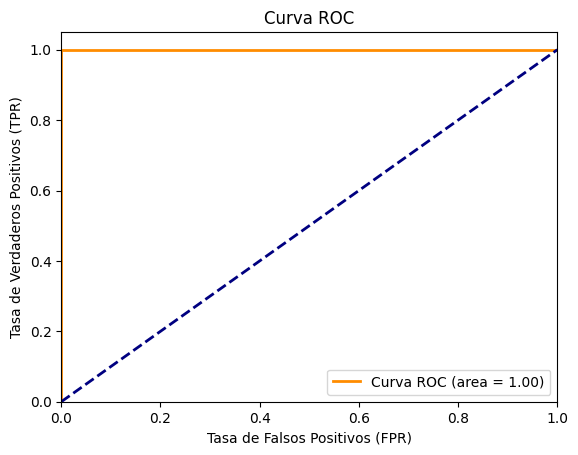

In [ ]:
# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Revisión del Rendimiento del Modelo

Ajuste de Hiperparámetros

In [ ]:
from keras.layers import Dropout

# Definir la arquitectura del modelo con Dropout
model = Sequential()
model.add(Dense(128, input_shape=(X_train_normalized.shape[1],), activation='relu'))
model.add(Dropout(0.5))  # Añadir Dropout con probabilidad de 0.5
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Añadir otro Dropout
model.add(Dense(1, activation='sigmoid'))  # Usar 'sigmoid' para clasificación binaria


In [ ]:
# Compilar el modelo con una tasa de aprendizaje menor
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Reducir la tasa de aprendizaje
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenar y evaluar con las modificaciones

In [ ]:
# Entrenar el modelo con más épocas
history = model.fit(X_train_normalized, y_train, epochs=100, batch_size=128, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print('Accuracy:', accuracy)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.6694 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 0.7319 - accuracy: 0.5000 - val_loss: 0.6691 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7290 - accuracy: 0.5000 - val_loss: 0.6688 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6740 - accuracy: 0.8333 - val_loss: 0.6685 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6857 - accuracy: 0.6667 - val_loss: 0.6682 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6764 - accuracy: 0.5000 - val_loss: 0.6680 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 0.7303 - accuracy: 0.5000 - val_loss: 0.6678 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

Matriz de Confusion

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test_normalized)

# Convertir las predicciones a etiquetas binarias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

1/1 [==============================] - 0s 61ms/step
Matriz de Confusión:
[[0 1]
 [0 2]]


Nueva curva ROC

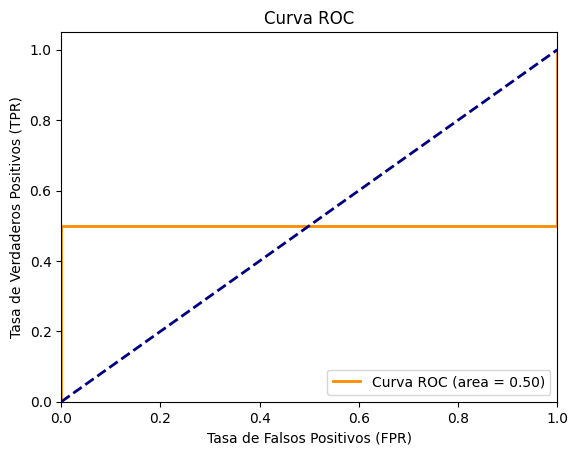

In [ ]:
# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()